In [1]:
import geopandas as gpd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [9]:
# Function to generate grid points within a bounding box
def generate_grid_points(min_x, min_y, max_x, max_y, distance):
    x_coords = np.arange(min_x, max_x + distance, distance)
    y_coords = np.arange(min_y, max_y + distance, distance)
    grid_points = [Point(x, y) for x in x_coords for y in y_coords]
    return grid_points

In [3]:
states_india = gpd.read_file(r"D:\Downloads\Administrative Boundary Database\STATE_BOUNDARY.shp")
coastline = gpd.read_file(r"D:\Downloads\data (1)\coastl_ind.shp")
dams = gpd.read_file(r"D:\CS\GitHub\Nuclear-Site-Selection\dam\Dam.shp")
coastline = coastline.to_crs(dams.crs)

In [11]:
# Buffer distance in meters
buffer_distance = 10000  # 10 km
grid_distance = 1000  # distance between points in the grid in meters

# Create buffers around each point
buffers = coastline.buffer(buffer_distance)

In [12]:
# Generate grid points for the bounding box of the buffers
all_grid_points = []

# Compute the combined bounding box of all buffers
minx, miny, maxx, maxy = buffers.total_bounds

In [13]:
# Generate the grid points within the combined bounding box
grid_points = generate_grid_points(minx, miny, maxx, maxy, grid_distance)

In [14]:
# Convert list of grid points to GeoDataFrame
grid_gdf = gpd.GeoDataFrame(geometry=grid_points, crs=dams.crs)

In [15]:
# Filter grid points to retain only those within any buffer
buffers_gdf = gpd.GeoDataFrame(geometry=buffers) 

In [16]:
joined = gpd.sjoin(grid_gdf,buffers_gdf,how = 'inner', op = 'within')

c:\Users\Nirman\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [17]:
joined = joined.drop_duplicates(subset='geometry')

In [18]:
states_india = gpd.read_file(r"D:\Downloads\Administrative Boundary Database\STATE_BOUNDARY.shp")

In [19]:
states_india = states_india.to_crs(dams.crs)

In [20]:
#Dividing the points state-wise
grid_gdf = gpd.overlay(joined,states_india, how = "intersection")

In [25]:
grid_gdf.to_file(r"D:\CS\GitHub\Nuclear-Site-Selection\coastline_gridpoints.shp")

C:\Users\Nirman\AppData\Local\Temp\ipykernel_29100\1458919294.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  grid_gdf.to_file(r"D:\CS\GitHub\Nuclear-Site-Selection\coastline_gridpoints.shp")


In [2]:
gdf = gpd.read_file(r"D:\CS\GitHub\Nuclear-Site-Selection\coastline_gridpoints.shp")

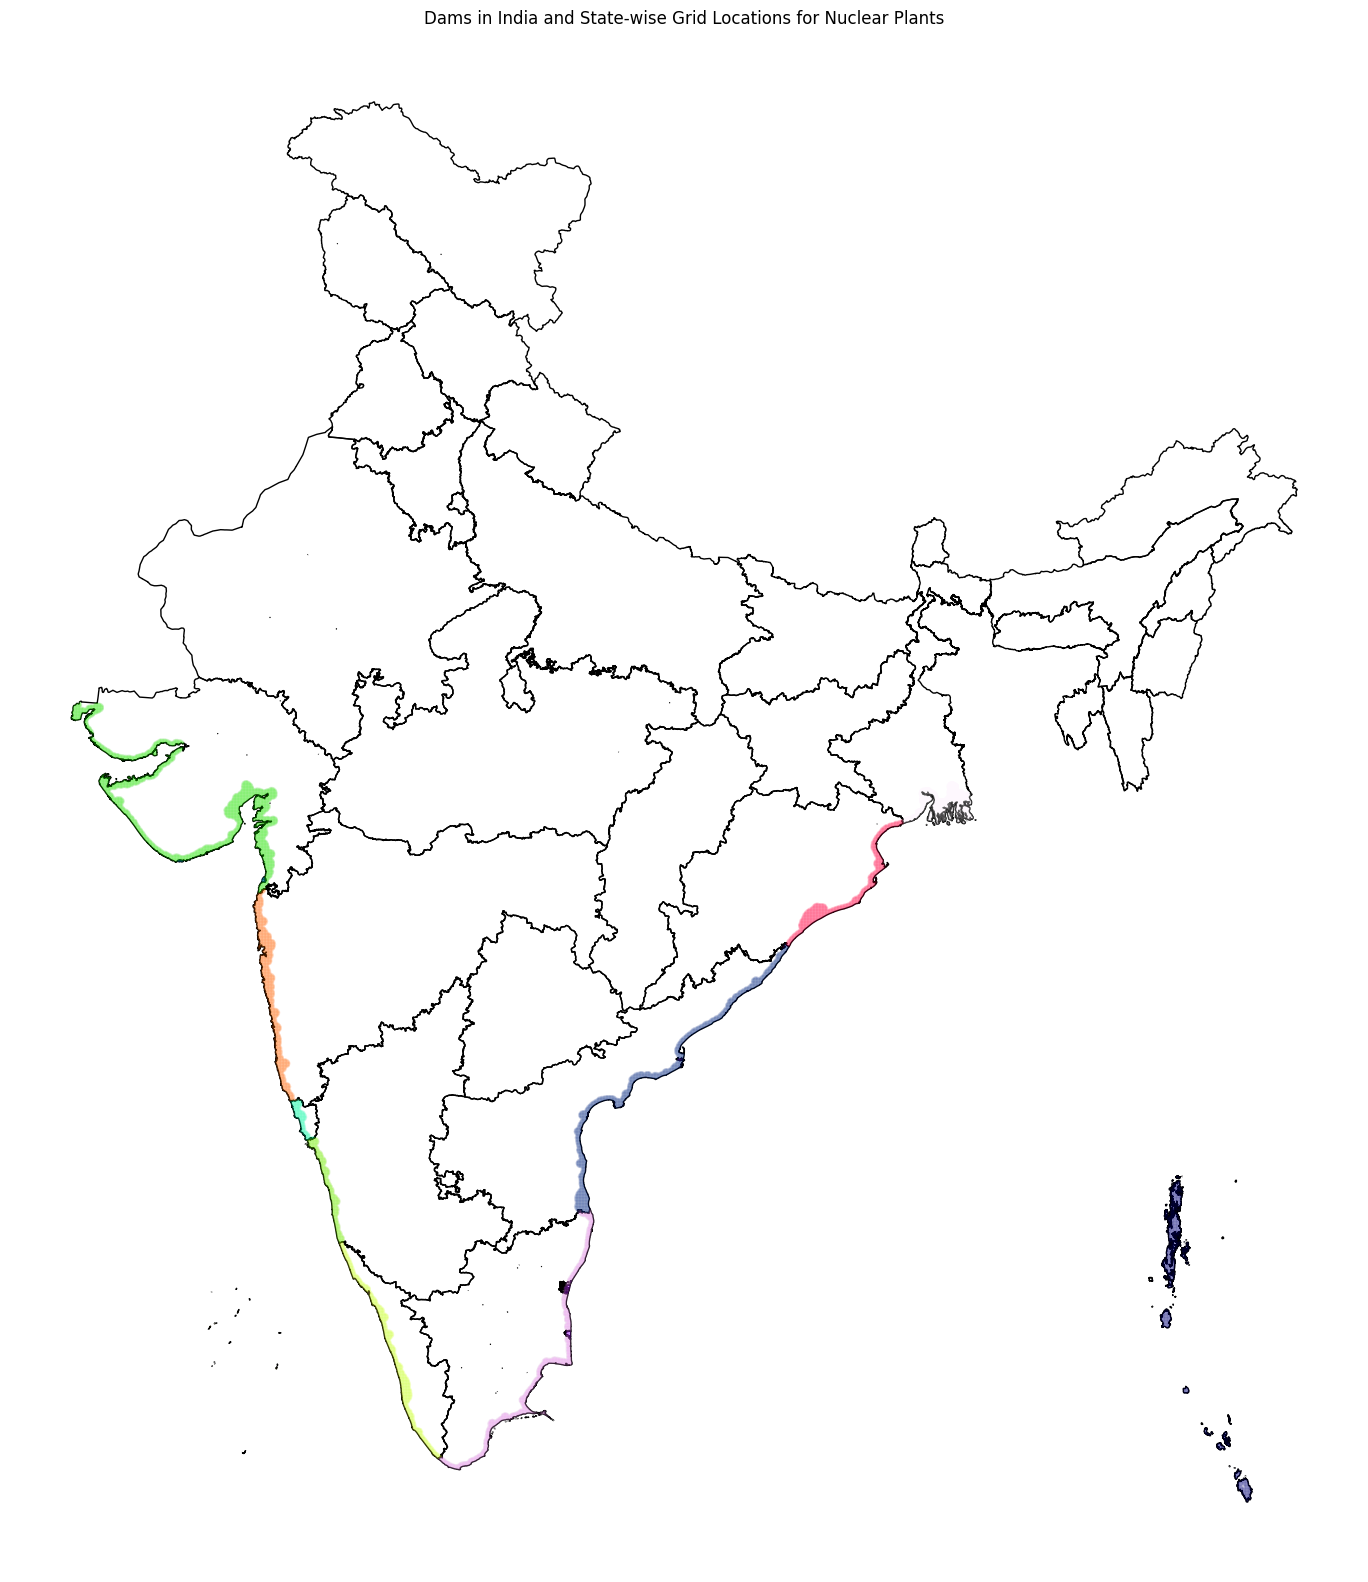

In [5]:
# Plot the results
fig, ax = plt.subplots(figsize=(20,20))
ax.axis('off')
states_india.plot(ax=ax, color='none', edgecolor='black')
#dams.plot(ax=ax, marker='.', markersize=0.5, color="#3251c6")
gdf.plot(ax=ax, marker='.', markersize=0.005, alpha=0.5,cmap = 'gist_ncar', column = "STATE")

plt.title("Dams in India and State-wise Grid Locations for Nuclear Plants")
plt.show()